
Data Location:  https://salaries.news.baltimoresun.com/ 


Descriptions:

The data provides us with the salary of the employees of the State of Maryland for the year 2018. The data set was acquired from Baltimore Sun’s yearly publication of government employee salaries. The dataset contains 17 columns and 998,747 rows.The data is 45.7 megabytes. I used the following 6 columns to do my analysis: first name, last name, class code, organization, annual salary, and year-to-date earnings. 



#DATA ANALYSIS

In [ ]:
import pandas
import numpy as np 
pandas.__version__ #import libraries 

In [ ]:
state_df = pandas.read_csv('C:\\Users\\nasir\\Desktop\\Data 602\\cy2018-md.csv') #Load the csv file 
state_df.head()

In [ ]:
state_df = state_df.drop([
'middle_initial',
'system',
'agency',
'subtitle',
'class_code',
'annual_salary',
'pay_rate',
'overtime_earnings',
'other_earnings',
'hire_date',
'term_date'], axis='columns') #drop irrelevant columns

In [116]:
state_df.columns=[
'first_name',
'last_name',
'class_code',
'organization',
'annual_salary',
'ytd_gross_earnings'] #Create a dataframe with important columns
state_df.head()

,first_name,last_name,class_code,organization,annual_salary,ytd_gross_earnings
0,DANIEL,STAPLES,NaN,BALTO CITY COMMUNITY COLLEGE,34000.0,37000.0
1,RUBEENA,ISMAIL,NaN,BALTO CITY COMMUNITY COLLEGE,13000.0,13000.0
2,NICOLE,BECKETTS,NaN,BALTO CITY COMMUNITY COLLEGE,99000.0,99000.0
3,ELISABETH,MACKEY,NaN,BALTO CITY COMMUNITY COLLEGE,75000.0,76000.0
4,PAUL,SHIVELY,NaN,BALTO CITY COMMUNITY COLLEGE,10000.0,10000.0


In [118]:
state_df.shape #rows and columns in the dataframe

(998747, 6)

In [119]:
state_df.info() #data related information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998747 entries, 0 to 998746
Data columns (total 6 columns):
first_name            109075 non-null object
last_name             109071 non-null object
class_code            2777 non-null object
organization          109102 non-null object
annual_salary         109102 non-null float64
ytd_gross_earnings    109102 non-null float64
dtypes: float64(2), object(4)
memory usage: 45.7+ MB


The datatypes of our features are objects(4) and float64(2). There are no missing values(non-null). There are 998747 entries just like we saw with the shape method. 

In [ ]:
state_df.describe() #Gives summary statistics of the numerical columns

To see statistics on non-numerical features, I explicitly indicated data the type 'object' to see the description. 

In [ ]:
state_df.describe(include=['object'])

For categorial features, we can use the value_counts methods to see the distributions of a column.

In [122]:
state_df['organization'].value_counts() #Different organizations within the state 

UNIVERSITY OF MARYLAND            49641
MARYLAND DEPARTMENT OF HEALTH      8406
DEPARTMENT OF TRANSPORTATION       7900
DEPT OF PUB SAFETY & COR SERVS     6457
MD DEPT OF HUMAN SERVICES          5757
                                  ...  
DEPT OF ENVIRONMENT                  12
GOVERNOR'S OFFICE FOR CHILDREN       10
BOARD OF PUBLIC WORKS                 9
MARYLAND TAX COURT                    8
CANAL PLACE PRESERV & DEV AUTH        4
Name: organization, Length: 74, dtype: int64

In [123]:
state_df.sort_values(by=['organization','class_code'],
                   ascending=[True, True]).head(10) #sorting by organization and class code 

,first_name,last_name,class_code,organization,annual_salary,ytd_gross_earnings
75,MICHAEL,STEPHENS,JR,BALTO CITY COMMUNITY COLLEGE,74000.0,74000.0
76,NATHANIEL,LAWSON,JR,BALTO CITY COMMUNITY COLLEGE,39000.0,41000.0
106,RICHARD,GREEN,JR,BALTO CITY COMMUNITY COLLEGE,43000.0,43000.0
126,JAMES,DYETT,JR,BALTO CITY COMMUNITY COLLEGE,77000.0,77000.0
136,EARL,WATSON,JR,BALTO CITY COMMUNITY COLLEGE,47000.0,47000.0
278,CALVIN,HARRIS,JR,BALTO CITY COMMUNITY COLLEGE,154000.0,154000.0
302,JEFFREY,WHITE,JR,BALTO CITY COMMUNITY COLLEGE,67000.0,67000.0
0,DANIEL,STAPLES,NaN,BALTO CITY COMMUNITY COLLEGE,34000.0,37000.0
1,RUBEENA,ISMAIL,NaN,BALTO CITY COMMUNITY COLLEGE,13000.0,13000.0
2,NICOLE,BECKETTS,NaN,BALTO CITY COMMUNITY COLLEGE,99000.0,99000.0


In [124]:
state_df.iloc[109101:] #Looking at the data manually 

,first_name,last_name,class_code,organization,annual_salary,ytd_gross_earnings
109101,FRANCIS,MORGAN,NaN,WORKERS' COMPENSATION COM,40000.0,40000.0
109102,NaN,NaN,NaN,NaN,NaN,NaN
109103,NaN,NaN,NaN,NaN,NaN,NaN
109104,NaN,NaN,NaN,NaN,NaN,NaN
109105,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
998742,NaN,NaN,NaN,NaN,NaN,NaN
998743,NaN,NaN,NaN,NaN,NaN,NaN
998744,NaN,NaN,NaN,NaN,NaN,NaN
998745,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
state_df.loc[state_df['organization']=='COMPTROLLER OF MARYLAND'] #Just seeing one specific organization 

,first_name,last_name,class_code,organization,annual_salary,ytd_gross_earnings
431,PETER,FRANCHOT,NaN,COMPTROLLER OF MARYLAND,149000.0,149000.0
432,JUSTIN,HAYES,NaN,COMPTROLLER OF MARYLAND,79000.0,79000.0
433,OLIVIA,HENDERSON,NaN,COMPTROLLER OF MARYLAND,44000.0,44000.0
434,LESLEY,HUNTER,NaN,COMPTROLLER OF MARYLAND,85000.0,85000.0
435,MICHAEL,SALEM,NaN,COMPTROLLER OF MARYLAND,106000.0,106000.0
...,...,...,...,...,...,...
1565,ASSAM,ALI,NaN,COMPTROLLER OF MARYLAND,14000.0,14000.0
1566,MONICA,MARSHALL,NaN,COMPTROLLER OF MARYLAND,41000.0,41000.0
1567,JERILYN,REILAND,NaN,COMPTROLLER OF MARYLAND,54000.0,58000.0
1568,SECELY,SMITH,NaN,COMPTROLLER OF MARYLAND,65000.0,65000.0


In [126]:
state_df.loc[0:9,'last_name' : 'ytd_gross_earnings'] #Let's see the all columns from last name to ytd gross earnings 

,last_name,class_code,organization,annual_salary,ytd_gross_earnings
0,STAPLES,NaN,BALTO CITY COMMUNITY COLLEGE,34000.0,37000.0
1,ISMAIL,NaN,BALTO CITY COMMUNITY COLLEGE,13000.0,13000.0
2,BECKETTS,NaN,BALTO CITY COMMUNITY COLLEGE,99000.0,99000.0
3,MACKEY,NaN,BALTO CITY COMMUNITY COLLEGE,75000.0,76000.0
4,SHIVELY,NaN,BALTO CITY COMMUNITY COLLEGE,10000.0,10000.0
5,BERROCAL,NaN,BALTO CITY COMMUNITY COLLEGE,51000.0,55000.0
6,GYESIE,NaN,BALTO CITY COMMUNITY COLLEGE,77000.0,77000.0
7,FOSTER,NaN,BALTO CITY COMMUNITY COLLEGE,44000.0,44000.0
8,RAO,NaN,BALTO CITY COMMUNITY COLLEGE,53000.0,53000.0
9,OLIVERMOORE,NaN,BALTO CITY COMMUNITY COLLEGE,11000.0,11000.0


In [127]:
state_df[state_df['annual_salary']==state_df['annual_salary'].max()] #Figure out the maximum salary 

,first_name,last_name,class_code,organization,annual_salary,ytd_gross_earnings
60918,BARTLEY,GRIFFITH,NaN,UNIVERSITY OF MARYLAND,967000.0,967000.0


##DATA VISUALIZATIONS##

In [ ]:
#import the relevant libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



%matplotlib inline

plt.style.use('bmh')

count    109102.000000
mean      44691.096405
std       44122.397519
min           0.000000
25%        5000.000000
50%       43000.000000
75%       63000.000000
max      967000.000000
Name: annual_salary, dtype: float64


C:\Users\nasir\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\nasir\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\nasir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\nasir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


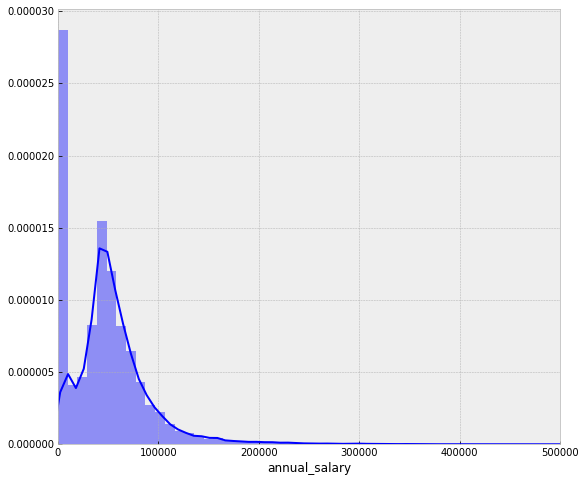

In [142]:
print(state_df['annual_salary'].describe()) #See the statistics
plt.figure(figsize=(9, 8))
plt.xlim(0,500000)
sns.distplot(state_df['annual_salary'], color='b', bins=100, hist_kws={'alpha': 0.4});#Plot annual salary distribution 

count    1.091020e+05
mean     4.979769e+04
std      4.814420e+04
min      0.000000e+00
25%      1.500000e+04
50%      4.600000e+04
75%      6.900000e+04
max      4.793000e+06
Name: ytd_gross_earnings, dtype: float64


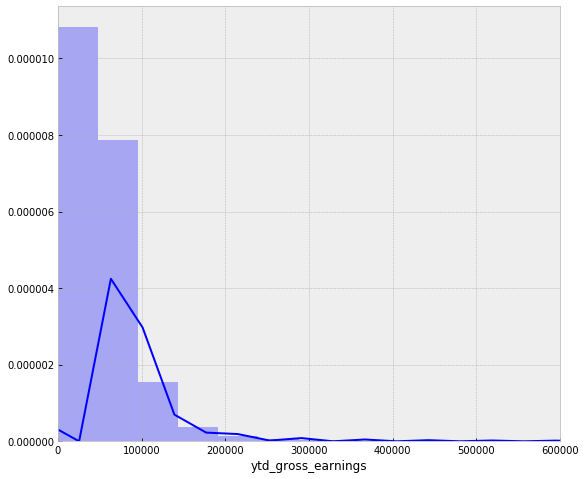

In [130]:
print(state_df['ytd_gross_earnings'].describe()) #Gross salary is slightly less than annual salary  
plt.figure(figsize=(9, 8))
plt.xlim(0,600000)
sns.distplot(state_df['ytd_gross_earnings'], color='b', bins=100, hist_kws={'alpha': .3}); #plot ytd grosss salary 

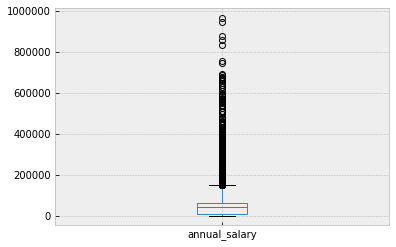

In [139]:
boxplot = state_df.boxplot(column=["annual_salary"]) #boxplot of annual_salary 


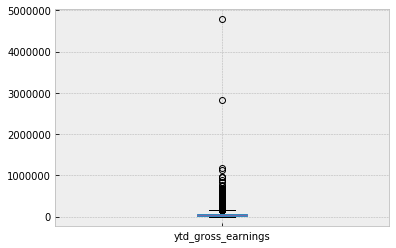

In [134]:
boxplot = state_df.boxplot(column=["ytd_gross_earnings"]) #box plot of gross salary 


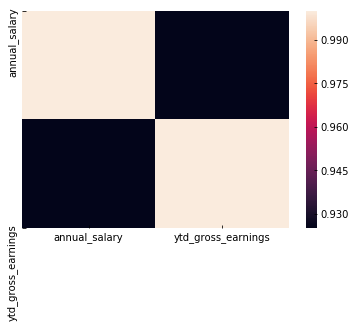

In [34]:
sns.heatmap(state_df.corr(),fmt = ".5f")